In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [61]:
data = pd.read_csv('../lab3/data.csv')
data.shape

(41188, 21)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [63]:
COLUMNS_FOR_FACTORISATION = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']
factorization_table = {}
for column in COLUMNS_FOR_FACTORISATION:
    data[column], table = pd.factorize(data[column])
    factorization_table[column] = pd.DataFrame(columns=[column], data=table)

In [64]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

# K-means кластеризация

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

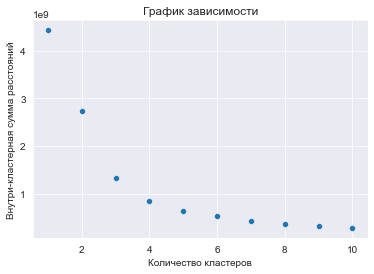

In [46]:
inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init= 'k-means++')
    k_means.fit(data.drop("y", axis=1))
    
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(x = [x for x in range(1, 11)], y = inertia)
plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [47]:
CLUSTERS = 4
model = KMeans(n_clusters=CLUSTERS)
model.fit(data.drop("y", axis=1))
clusters = pd.DataFrame( columns=data.columns.drop("y"), data=model.cluster_centers_)
clusters["Amount"] = np.unique(model.labels_, return_counts=True)[1]

clusters

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Amount
0,39.930622,3.222487,0.506598,2.897837,0.784077,0.500340,0.202932,0.382227,3.181710,1.994150,...,2.681608,999.000000,0.117297,0.210924,0.194477,93.584236,-40.537223,3.759329,5174.127166,29406
1,41.873502,4.399467,0.573236,2.640479,0.960053,0.472703,0.198402,0.071904,3.835553,1.979361,...,1.821571,5.996671,1.663782,1.093875,-2.096538,93.342629,-38.338282,0.986428,5029.293076,1502
2,39.743363,3.211125,0.512642,2.950063,0.783186,0.511378,0.208597,0.345133,3.334387,1.942478,...,2.578382,990.857143,0.106195,0.179520,0.198293,93.607946,-40.821997,3.743559,5173.126233,1582
3,40.071609,3.202989,0.513103,2.878621,0.788276,0.502414,0.187701,0.362184,3.438046,2.000345,...,2.309080,999.000000,0.115862,0.200920,0.056276,93.581057,-40.701161,3.587412,5165.742069,8698


In [49]:
CLUSTERS = 2
model = KMeans(n_clusters=CLUSTERS)
model.fit(data.drop("y", axis=1))
clusters = pd.DataFrame( columns=data.columns.drop("y"), data=model.cluster_centers_)
clusters["Amount"] = np.unique(model.labels_, return_counts=True)[1]

clusters

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Amount
0,40.108119,3.296454,0.514241,2.864755,0.799264,0.510560,0.196280,0.326293,3.426855,1.979268,...,2.405542,940.162372,0.195699,0.235419,0.025867,93.585451,-40.763902,3.534598,5162.654524,5151
1,40.012019,3.255753,0.510117,2.889500,0.790213,0.498709,0.200266,0.370833,3.242457,1.994893,...,2.590807,965.671885,0.169706,0.240431,0.089910,93.574262,-40.465168,3.633710,5167.663561,36037


In [50]:
len(data[data['y'] == 1]), len(data[data['y'] == 0])

(4640, 36548)